#Examen Parcial 2 Análisis de Datos I.
## Ingeniería en Industria Conectada 13 Diciembre 2023

Nombre : Eduardo Vioque Puebla


## Parte1.- Teoría ( 4 ptos)

###1.- En el Análisis de componentes principales, la varianza acumulada nos permite:
a) Decidir el mínimo número de componentes que explican los datos  
b) Definir cúantas nuevas variables tenemos  
c) Sólo explica la varianza de los datos  
d) Ninguna de las anteriores


Respuesta:
a) Decidir el mínimo número de componentes que explican los datos

###2.-En el aprendizaje supervisado se tienen

a) Datos de entrenamiento  
b) Salidas deseadas  
c) Sòlo a  
d) a y b

Respuesta:
d) a y b   

###3.-En el aprendizaje no supervisado se tienen

a) Datos de entrenamiento  
b) Salidas deseadas  
c) Sòlo a  
d) a y b

Respuesta:
a) Datos de entrenamiento y c) Sòlo a

###4.- El aprendizaje por refuerzo es

a) Supervisado   
b) No supervisado   
c) Semisupervisado  
d) Ninguna de las anteriores

Respuesta:
d) Ninguna de las anteriores

###5.-Si se intenta predecir una variable $y$ que toma valores reales hablamos de  

a) Regresión   
b) Clasificación  
c) Arboles de decisión  
d) Ninguna de las anteriores  

Respuesta:
a) Regresión

###6.- La Precisión y recuperación son:
a) Medidas para la rapidez de un algoritmo de aprendizaje  
b) Medidas para la evaluación de un determinado algoritmo  
c) Medidas para la robustez de un conjunto de datos  
d) Ninguna de las anteriores

Respuesta:
b) Medidas para la evaluación de un determinado algoritmo

###7.-En regresión lineal, la función de coste

a) Mide la diferencia, o error, entre la "$y$" real y la "$y$" pronosticada  
b) Mide el coste computacional de un algoritmo  
c) sirve para calcular el error en los parámetros del modelo  
d) No sirve para nada  

Respuesta:
a) Mide la diferencia, o error, entre la "$y$" real y la "$y$" pronosticada

###8.-El algoritmo del gradiente descendente nos ayuda a

a) Encontrar los parámetros de un modelo de regresión  
b) Es un algoritmo de optimización  
c) a y b  
d) Sólo b  

Respuesta:
c) a y b

###9.-La regresión Logística

a) Predice la probabilidad de ocurrencia de un evento binario  
b) Se utiliza en problemas de clasidicación  
c) a y b  
d) Sólo b

Respuesta:
c) a y b 

###10.- La ganancia de información es

a) La disminución de la entropía   
b) El aumento de entropía  
c) No tiene que ver con la entropía  
d) Ninguna de las anteriores  

Respuesta :
a) La disminución de la entropía

## Parte2.- Ejercicios. (6 ptos)

#### Ejercicio 1.- Una empresa de coches ha sacado un nuevo modelo al mercado. Queremos saber la probabilidad de que una persona con una cierta edad y un determinado salario pueda comprar ese coche.

In [1]:
# 1. Importar librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split as separar
from sklearn.preprocessing import MinMaxScaler

In [2]:
# 2. Importar datos
datos = pd.read_csv('https://drive.google.com/uc?id=1Tt2YOz6CVUCqgQ4Ob50PdWG81UyyeQTB')
datos.head(10)

,Identificador,Sexo,Edad,Salario,Compra
0,15624510,Hombre,19,19000,0
1,15810944,Hombre,35,20000,0
2,15668575,Mujer,26,43000,0
3,15603246,Mujer,27,57000,0
4,15804002,Hombre,19,76000,0
5,15728773,Hombre,27,58000,0
6,15598044,Mujer,27,84000,0
7,15694829,Mujer,32,150000,1
8,15600575,Hombre,25,33000,0
9,15727311,Mujer,35,65000,0


In [3]:
# 3. Crear variables independientes (edad y salario) y respuesta (compra)
x = datos[['Edad', 'Salario']]
y = datos['Compra']

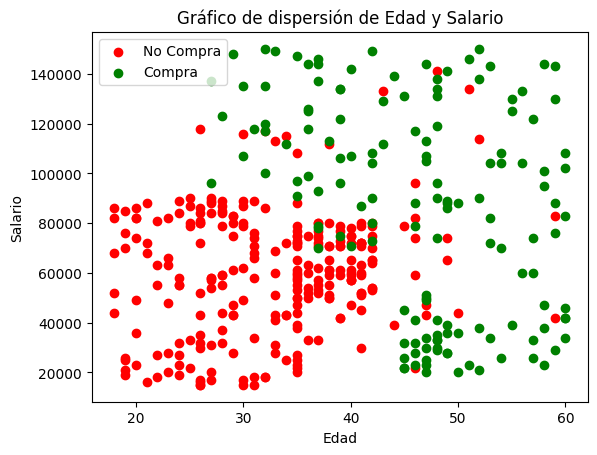

In [4]:
# 4. Visualizar las variables independientes (gráfico de puntos con dos colores en base a la variable compra)
fig, ax = plt.subplots()

ax.scatter(x.loc[y == 0, 'Edad'], x.loc[y == 0, 'Salario'], color='red', label='No Compra')
ax.scatter(x.loc[y == 1, 'Edad'], x.loc[y == 1, 'Salario'], color='green', label='Compra')

ax.set_xlabel('Edad')
ax.set_ylabel('Salario')
ax.set_title('Gráfico de dispersión de Edad y Salario')

ax.legend()
plt.show()

In [5]:
# 5. Obtener los datos en Entrenamiento (75%) y Validación (25%)
# imprimir la forma (shape) de cada subconjunto

X_train, X_val, y_train, y_val = separar(x, y, test_size=0.25, random_state=42)

print("Forma de X_train:", X_train.shape)
print("Forma de X_val:", X_val.shape)
print("Forma de y_train:", y_train.shape)
print("Forma de y_val:", y_val.shape)

Forma de X_train: (300, 2)
Forma de X_val: (100, 2)
Forma de y_train: (300,)
Forma de y_val: (100,)


In [6]:
# 6. Escalar los datos con MinMaxScaler() para trabajar en las mismas escalas
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)


In [7]:
# 7. Crear el modelo de regresión logística mediante la librería correspondiente de sklearn
from sklearn.linear_model import LogisticRegression as LR
modelo_reg_log = LR()
modelo_reg_log.fit(X_train_scaled, y_train)

LogisticRegression()

In [8]:
# 8. Hacer las predicciones
y_pred = modelo_reg_log.predict(X_val_scaled)


In [9]:
# 9. Crear la Matriz de Confusión para evaluar la clasificación realizada
from sklearn.metrics import confusion_matrix as CM
matriz_confusion = CM(y_val, y_pred)

print("Matriz de Confusión:")
print(matriz_confusion)

Matriz de Confusión:
[[62  1]
 [12 25]]


In [11]:
# 10.-Una persona desconocida con 60 años y salario 50000 que probabilidad tiene de comprar el coche ?
nueva_persona = np.array([[60, 50000]])
nueva_persona_scaled = scaler.transform(nueva_persona)

probabilidad_compra = modelo_reg_log.predict_proba(nueva_persona_scaled)[:, 1]
print("La probabilidad de compra es:", probabilidad_compra[0])


La probabilidad de compra es: 0.7846490688193254


c:\Users\evpue\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


#### Ejercicio 2.- Arbol de Decisión tipo de pez

In [12]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go

In [13]:
# Leer datos
df = pd.read_csv("https://drive.google.com/uc?id=1hZg7PIyK-ce_r0YWTBUyDLFumQRSCmf8")

df.head(5)


,length,weight,type
0,8.618381,7.848030,tuna
1,2.522046,8.762507,tuna
2,2.035690,7.101971,tuna
3,6.695008,4.953932,salmon
4,9.834069,7.908453,tuna


In [14]:
# 1.- Mostrar cuantas filas y columnas?
print("Número de filas:", df.shape[0])
print("Número de columnas:", df.shape[1])

Número de filas: 1000
Número de columnas: 3


In [15]:
# 2.- Imprimir los nombres de las columnas
print(df.columns)

Index(['length', 'weight', 'type'], dtype='object')


In [16]:
# 3.- Imprimir la distribución de clases
print(df["type"].value_counts())

type
tuna      608
salmon    392
Name: count, dtype: int64


In [17]:
# 4.- Obtener los datos X y la variable objetivo y
print(df["type"].value_counts())
X = df.drop(['type'], axis=1)
y = df['type']

type
tuna      608
salmon    392
Name: count, dtype: int64


In [18]:
# 5.- Obtener los conjuntos de ntrenamiento (77%) y test (33%)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

print("Forma de X_train:", X_train.shape)
print("Forma de X_test:", X_test.shape)
print("Forma de y_train:", y_train.shape)
print("Forma de y_test:", y_test.shape)

Forma de X_train: (670, 2)
Forma de X_test: (330, 2)
Forma de y_train: (670,)
Forma de y_test: (330,)


In [19]:
# Veamos que forma tienen
X_train.shape, X_test.shape

((670, 2), (330, 2))

In [20]:
from sklearn.tree import DecisionTreeClassifier

In [21]:
# 6.- instaciar el modelo de ñarbol de decición utilizando el criterio de Gini
modelo_arbol = DecisionTreeClassifier(criterion='gini')

In [22]:
# 7.- Imprimir la Precisión con el conjunto de entrenamiento y el de test
from sklearn.metrics import accuracy_score

modelo_arbol.fit(X_train, y_train)
y_train_pred = modelo_arbol.predict(X_train)
y_test_pred = modelo_arbol.predict(X_test)

precision_train = accuracy_score(y_train, y_train_pred)
precision_test = accuracy_score(y_test, y_test_pred)

print("Precisión en el conjunto de entrenamiento:", precision_train)
print("Precisión en el conjunto de test:", precision_test)


Precisión en el conjunto de entrenamiento: 1.0
Precisión en el conjunto de test: 0.990909090909091


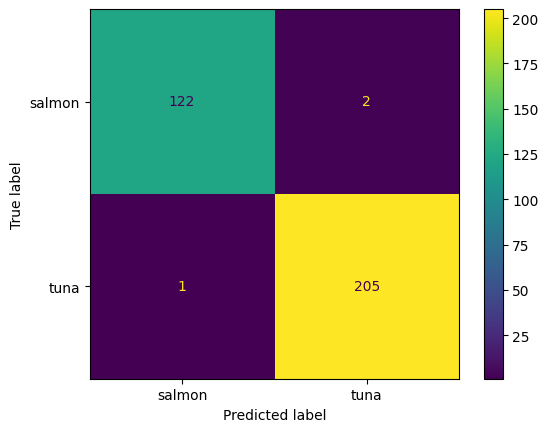

In [23]:
# 8.- Imprimir la Matriz de Confusión

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
matriz_confusion = confusion_matrix(y_test, y_test_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=matriz_confusion, display_labels=modelo_arbol.classes_)
disp.plot()
plt.show()

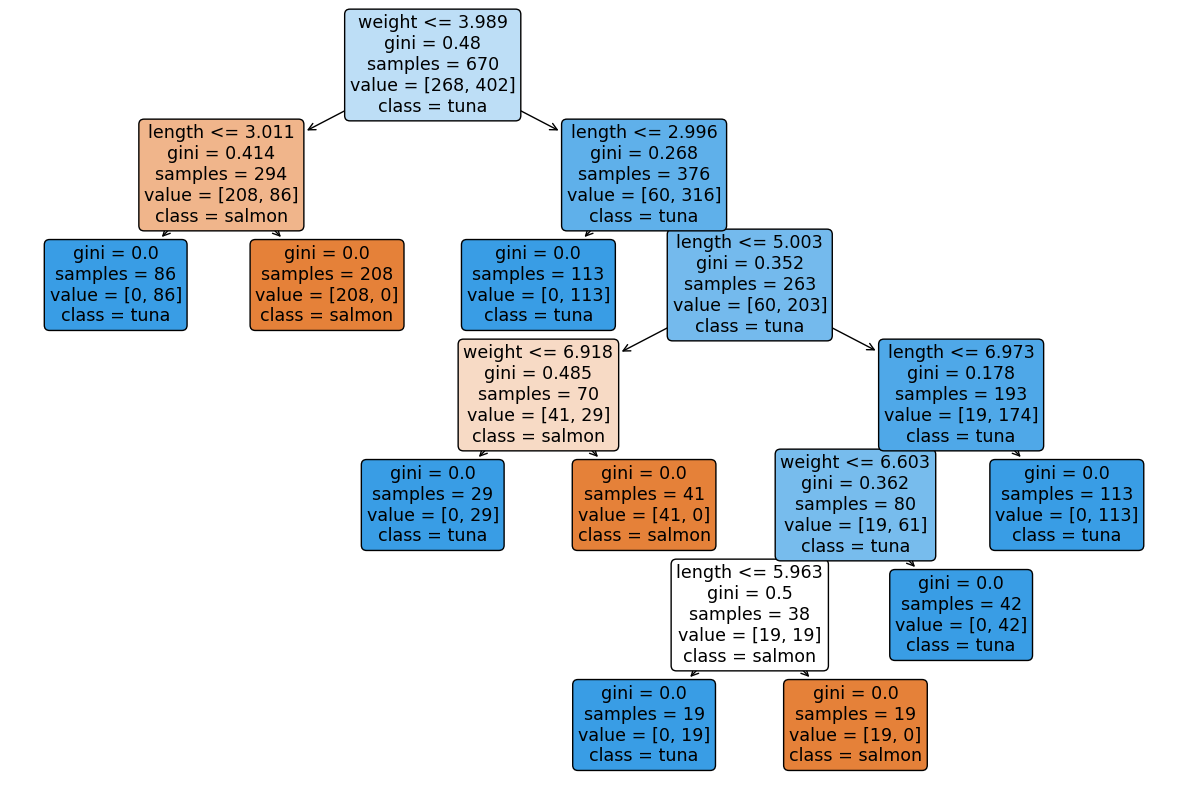

In [24]:
# 9.- Visualizar el árbol obtenido
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
plot_tree(modelo_arbol, feature_names=X.columns, class_names=modelo_arbol.classes_, filled=True, rounded=True)
plt.show()